In [1]:
# All imports and setups 

%run ../../../common_functions/import_all.py

import sys
sys.path.append('../../')

import statsmodels.api as sm

from common_functions.setup_notebook import *

config_ipython()
setup_matplotlib()
set_css_style()

# What's in the residuals of a regression?

## Let's play with the residuals

### With some fake data

Let us fabricate some data and fit them with OLS in order to have a look at the residuals. We use $500$ independent variables in the range $0$ to $100$:

In [3]:
x = np.linspace(0, 100, num=500)

and a dependent variable which lies on a line with slope $2$ but contains some noise. Noise is given in such a way that its amplitude is extracted from a gaussian trend, this gaussian:

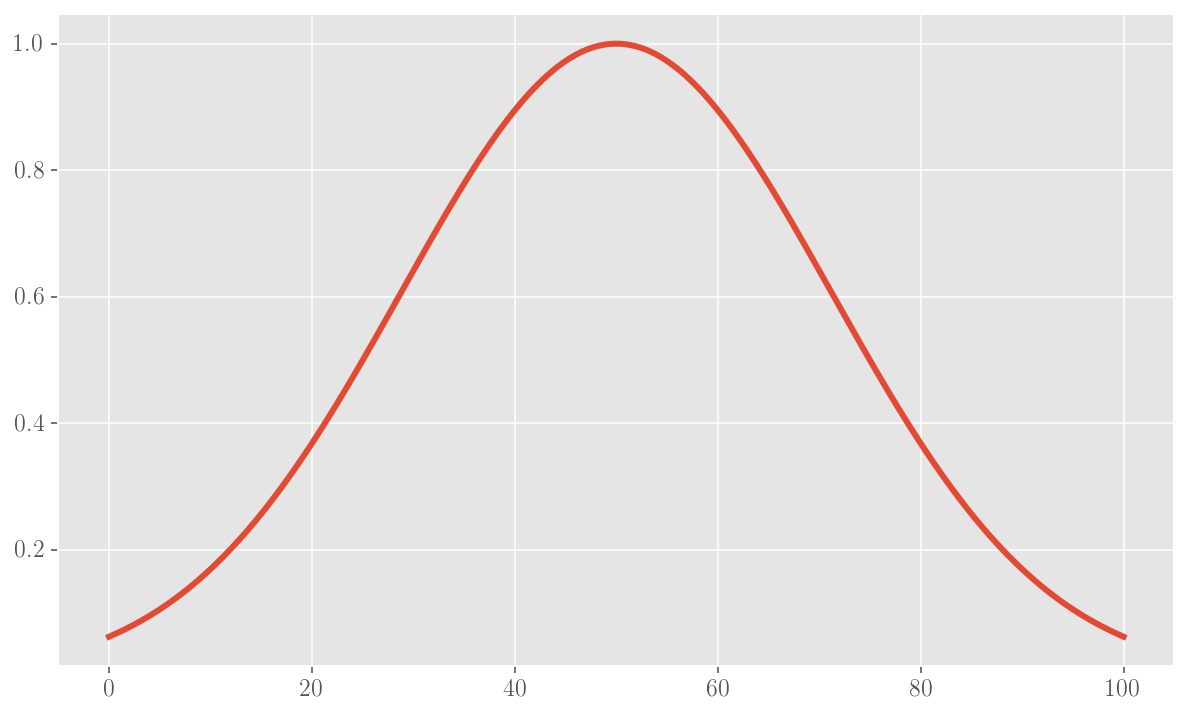

In [5]:
x = np.linspace(0, 100, num=500)
g = np.exp(-(x-50)**2/30**2)

plt.plot(x, g)
plt.show();

This way points in the middle of the scale are given higher possibility to vary from the line. So these are the $y$ points:

In [7]:
y = [2 * i + np.random.randint(-np.exp(-(i-50)**2/30**2)*30, np.exp(-(i-50)**2/30**2)*30) for i in x]

Let's fit an OLS on these data (using [`statsmodels`](http://statsmodels.sourceforge.net/stable/)). We see that the slope we obtain is $\approx 1.99$ and the $R^2$ comes as 0.99.

Now let's plot both the data points and the fitting line: the fact that residuals are larger in the middle is quite visible.

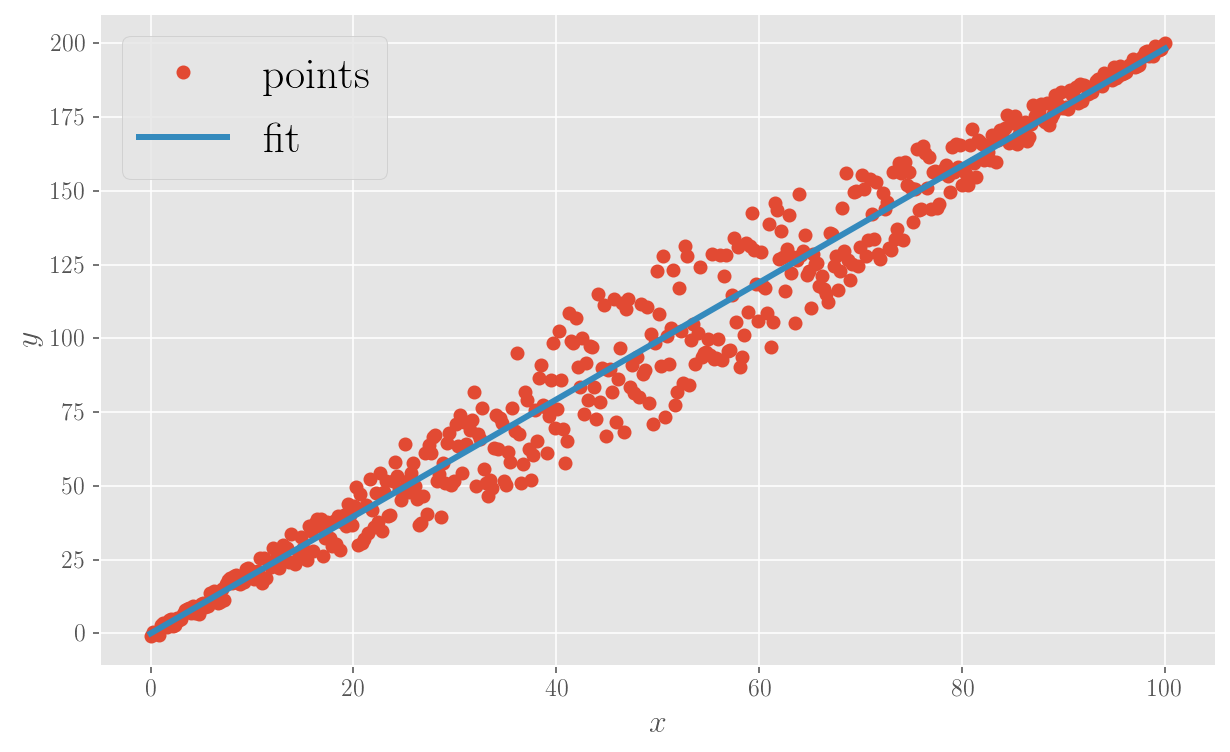

In [17]:
plt.plot(x, y, 'o', label='points')
plt.plot(x, fit_result.params * x, label='fit')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.savefig('points-line.png', dpi=200)
plt.show();

Residuals are, as expected, normally centered around $0$:

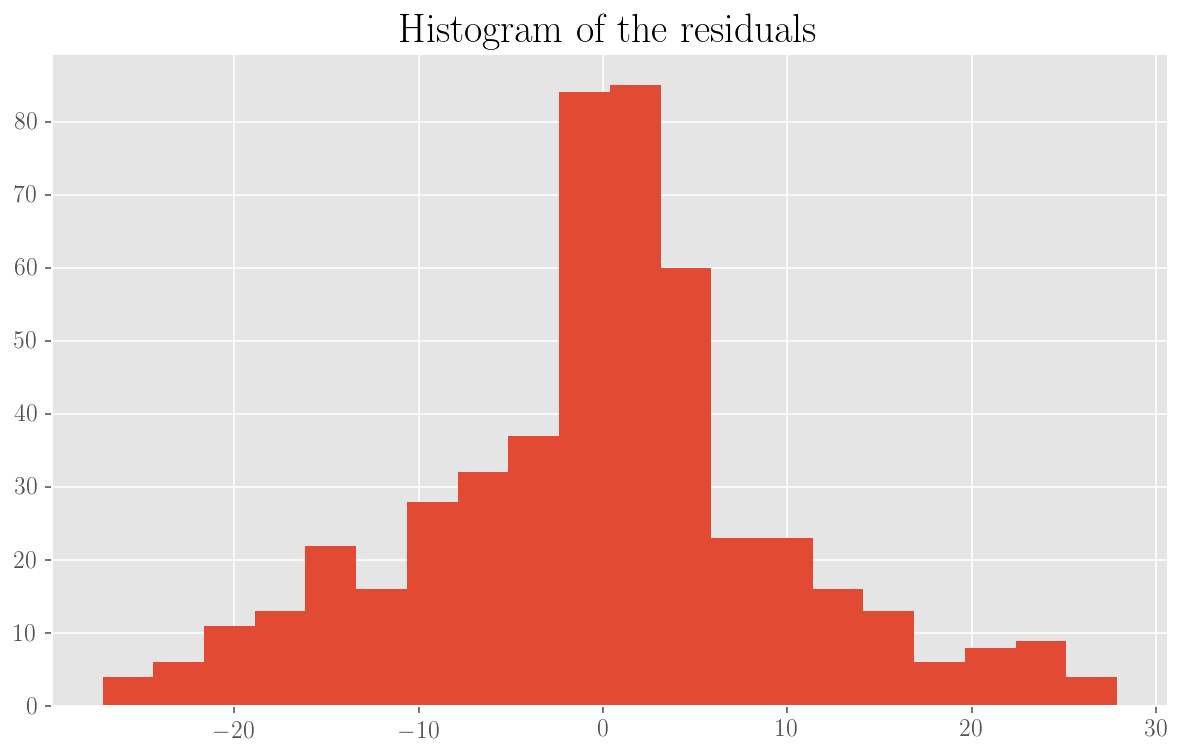

In [18]:
plt.hist(fit_result.resid, bins=20)
plt.title('Histogram of the residuals')
plt.savefig('res-hist.png', dpi=200)
plt.show();

In this silly dataset, residuals are normally distributed but they display a pattern with the independent variable (well, _we_ have imposed it!). In fact, if we plot a scatter of them against $x$, this appears very clearly: points in the middle have larger errors. 

This because we have imposed this feature to our data so it is an obvious "discovery", but in a general case the analysis of the trend of residuals can lead to interesting considerations which the sole histogram would hide. See this treatment [[1]](#1) for a vivid example. 

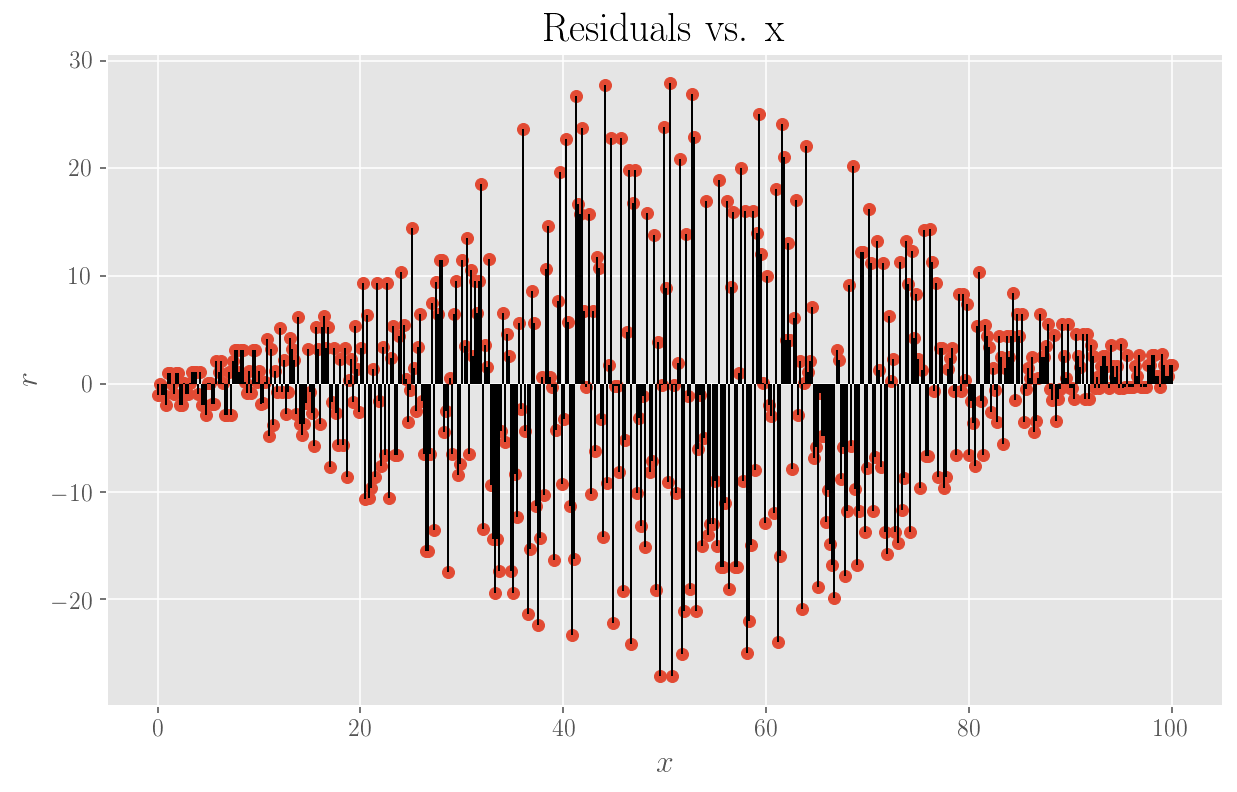

In [19]:
plt.scatter(x, fit_result.resid)
plt.vlines(x, 0, fit_result.resid, lw=1)
plt.xlabel('$x$')
plt.ylabel('$r$')
plt.title('Residuals vs. x')
plt.savefig('res-vs-x.png', dpi=200)
plt.show();

The article in [[1]](#1) reports a very nice discussion over all this.

### With some real data

We'll now use one of the datasets readily vailable in `statsmodels` to perform an OLS. In particular, let's choose the dataset named [_Scotland_](http://statsmodels.sourceforge.net/0.5.0/datasets/generated/scotland.html), which contains data about the devolution referendum held in Scotland in 1997: the question to the voters was about the creation of a Scottish Parliament with its own powers, specifically over taxation.

There are $32$ rows in the data, one for each county and $8$ attributes, the dependent variable is the proportion of YES votes obtained. The attributes are:

* _COUTAX_: ££ of council tax
* _UNEMPF_: percentage of total unemployment benefits claims from females
* _MOR_: standardized mortality rate (UK one set to 100)
* _ACT_: percentage of labor force participation
* _GDP_: GDP
* _AGE_: percentage of children aged 5 to 15
* *COUTAX_FEMALEUNEMP*: _COUTAX * UNEMPF_

In [20]:
dataset = sm.datasets.scotland.load_pandas()
df = dataset.data

This is a sample of the dataset:

In [21]:
df.head()

,YES,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
0,60.3,712.0,21.0,105.0,82.4,13566.0,12.3,14952.0
1,52.3,643.0,26.5,97.0,80.2,13566.0,15.3,17039.5
2,53.4,679.0,28.3,113.0,86.3,9611.0,13.9,19215.7
3,57.0,801.0,27.1,109.0,80.4,9483.0,13.6,21707.1
4,68.7,753.0,22.0,115.0,64.7,9265.0,14.6,16566.0


And this is the basic statistics and correlations:

In [22]:
df.describe()
df.corr()

,YES,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000
mean,61.440625,744.375000,22.665625,113.906250,79.10000,10057.500000,14.212500,16723.978125
std,7.970747,110.493249,2.586268,10.611495,5.60334,1676.263548,0.903666,2143.153119
min,47.400000,486.000000,18.500000,96.000000,64.70000,8298.000000,11.600000,11275.200000
25%,53.225000,681.500000,20.725000,106.750000,76.70000,9265.000000,13.700000,15820.500000
50%,62.400000,750.000000,22.300000,112.500000,80.20000,9483.000000,14.350000,16821.750000
75%,67.625000,792.250000,23.725000,119.500000,82.55000,9611.000000,14.900000,17928.900000
max,75.000000,982.000000,28.300000,138.000000,87.80000,13566.000000,15.900000,21707.100000


,YES,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
YES,1.000000,0.667959,-0.755443,0.765713,-0.653138,-0.044874,0.031545,0.103336
COUTAX,0.667959,1.000000,-0.533699,0.541224,-0.631103,0.116699,-0.339270,0.665339
UNEMPF,-0.755443,-0.533699,1.000000,-0.650944,0.436801,-0.012270,0.096945,0.266741
MOR,0.765713,0.541224,-0.650944,1.000000,-0.433093,-0.132053,0.150160,0.011768
ACT,-0.653138,-0.631103,0.436801,-0.433093,1.000000,0.157083,0.186724,-0.335845
GDP,-0.044874,0.116699,-0.012270,-0.132053,0.157083,1.000000,-0.290686,0.117110
AGE,0.031545,-0.339270,0.096945,0.150160,0.186724,-0.290686,1.000000,-0.338725
COUTAX_FEMALEUNEMP,0.103336,0.665339,0.266741,0.011768,-0.335845,0.117110,-0.338725,1.000000


Using all the attributes, an OLS fit yields a very high $R^2$:

In [23]:
fit_result = sm.OLS(dataset.endog, dataset.exog).fit()
fit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    YES   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              952.4
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                    1.03e-28
Time:                        15:33:43   Log-Likelihood:                         -88.007
No. Observations:                  32   AIC:                                      190.0
Df Residuals:                      25   BIC:                                      200.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
COUTAX                 0.0496      0.036      1.381      0.179      -0.024       0.124
UNEMPF                 0.0972      1.154      0.084      0.934      -2.279       2.473
MOR                    0.2738      0.117      2.347      0.027       0.034       0.514
ACT                   -0.2526      0.178     -1.417      0.169      -0.620       0.114
GDP                    0.0004      0.001      0.737      0.468      -0.001       0.001
AGE                    1.9436      1.058      1.837      0.078      -0.235       4.122
COUTAX_FEMALEUNEMP    -0.0012      0.002     -0.675      0.506      -0.005       0.003
==============================================================================
Omnibus:                        0.226   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.409
Skew:                           0.140   Prob(JB):                        0.815
Kurtosis:                       2.522   Cond. No.                     3.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is the histogram of residuals (note that the number of points is quite small):

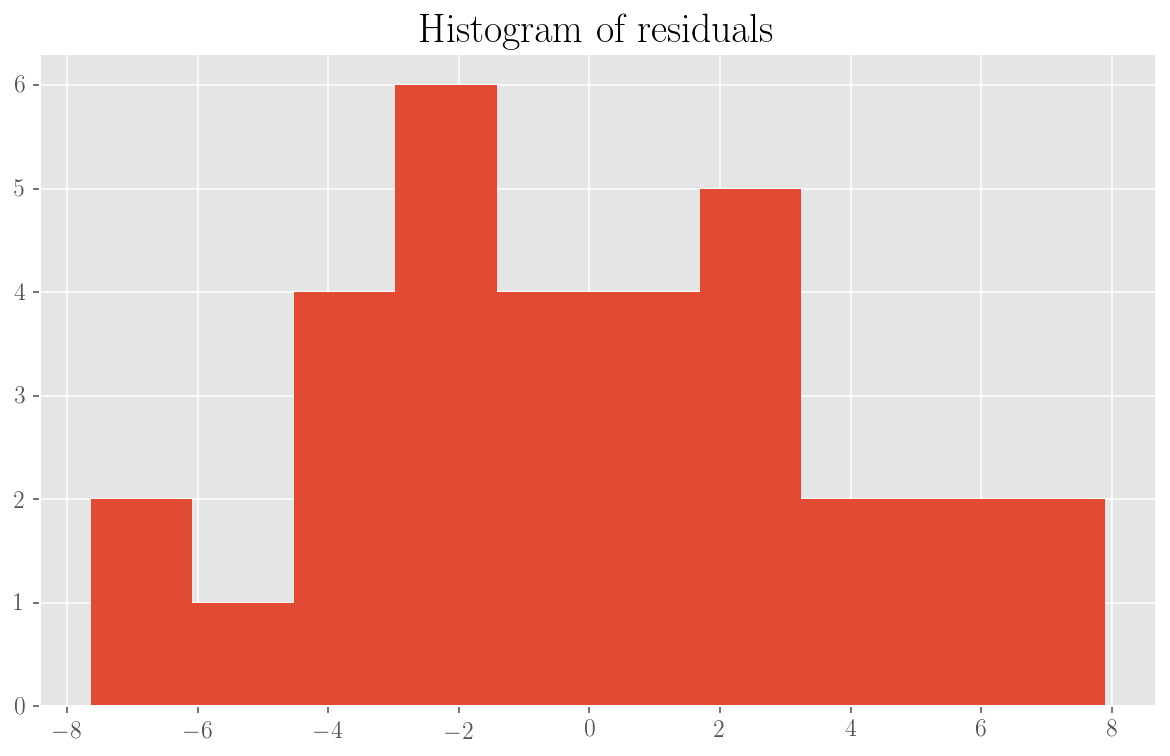

In [24]:
plt.hist(fit_result.resid, bins=10)
plt.title('Histogram of residuals')
plt.savefig('scotland-res-hist.png', dpi=200)
plt.show();

Clearly we cannot reproduce the residual plot we did above because we have a matrix of independent variables in this case and not a 1-dimensional array.

### The influence plot

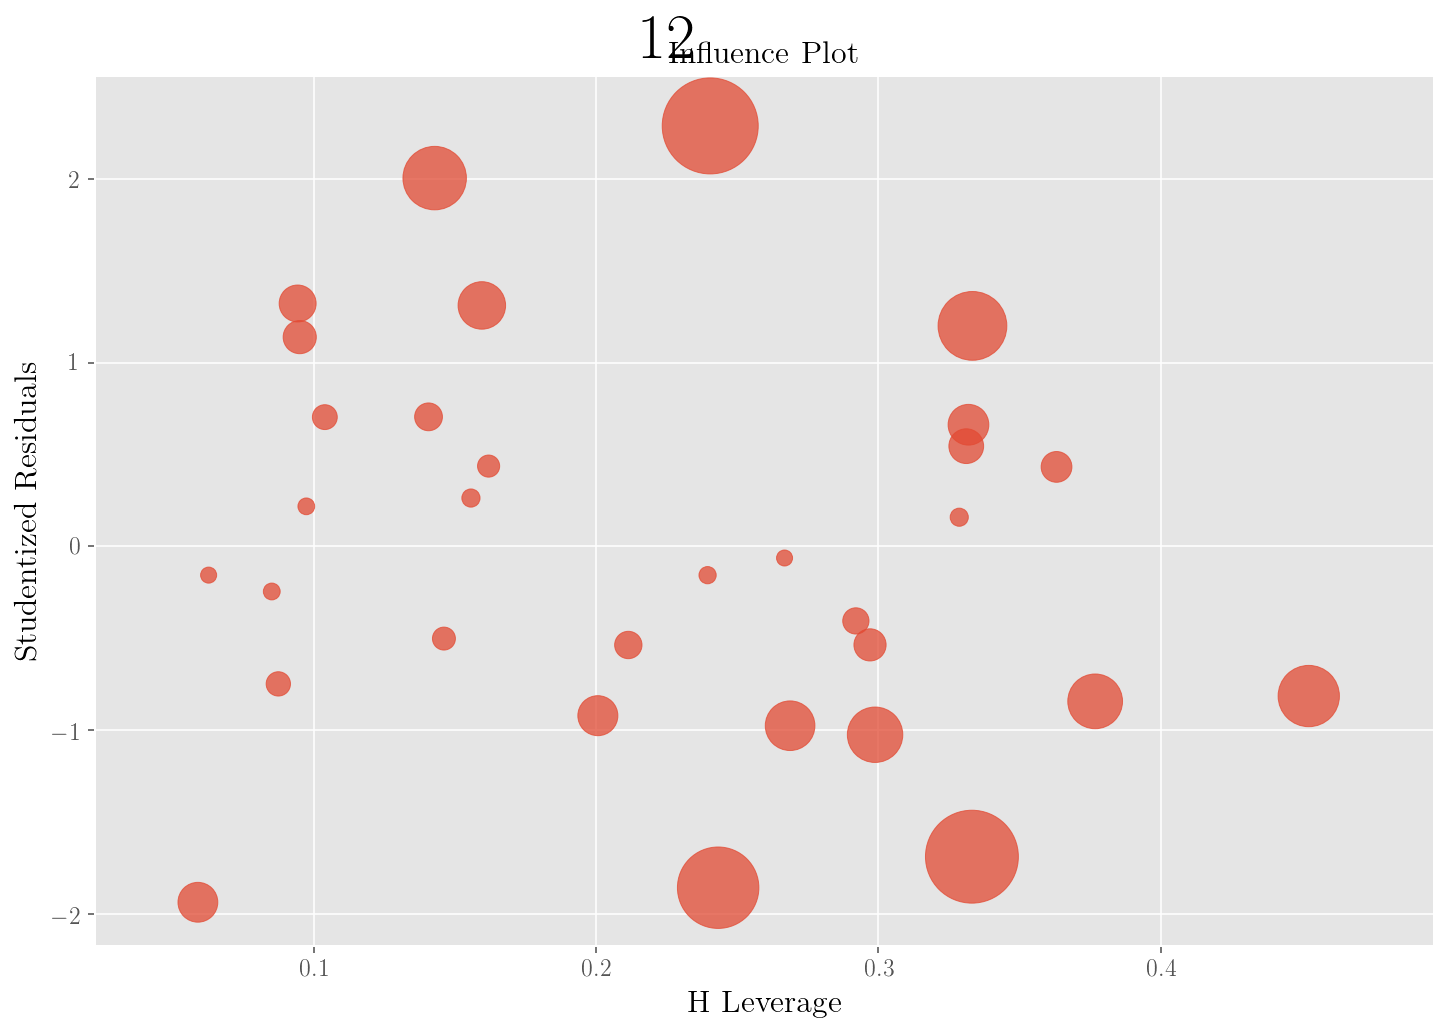

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fit_result, ax=ax, criterion="cooks")
plt.savefig('influence-plot.png', dpi=200)
plt.show()